In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

array([5, 0, 4, 1, 9], dtype=uint8)

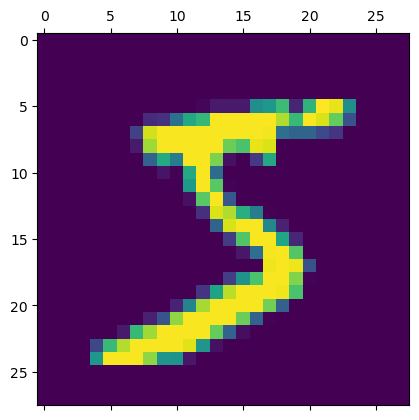

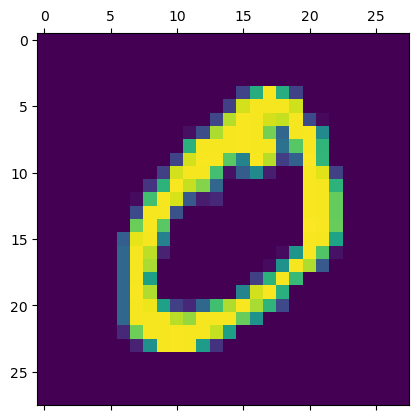

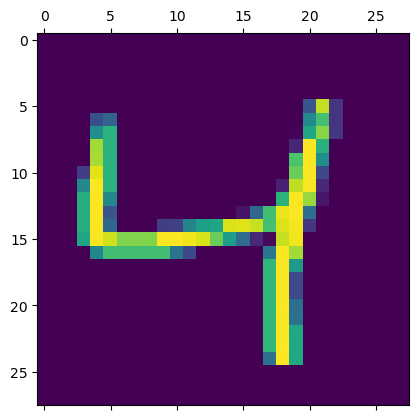

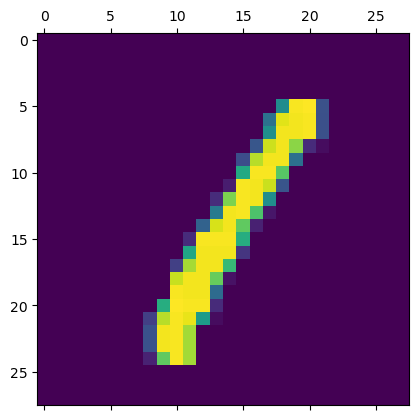

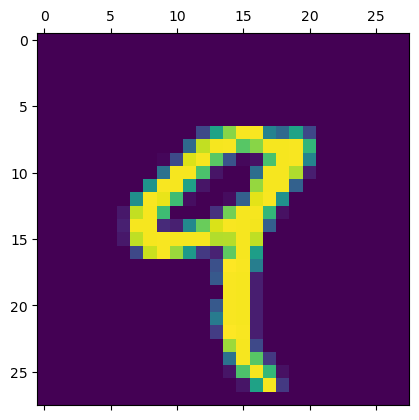

In [4]:
for i in range(5):
    plt.matshow(x_train[i])
y_train[0:5]

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train_flat = x_train.reshape(60000,28*28)/255
x_test_flat = x_test.reshape(10000,28*28)/255

In [7]:
x_train_flat.shape

(60000, 784)

In [8]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 755us/step - loss: 0.4669 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 727us/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 750us/step - loss: 0.2729 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 1s 744us/step - loss: 0.2660 - accuracy: 0.9261


In [10]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 717us/step - loss: 0.2731 - accuracy: 0.9239


[0.27307751774787903, 0.9239000082015991]

In [11]:
y_pred = model.predict(x_test_flat)

313/313 [==============================] - 0s 578us/step


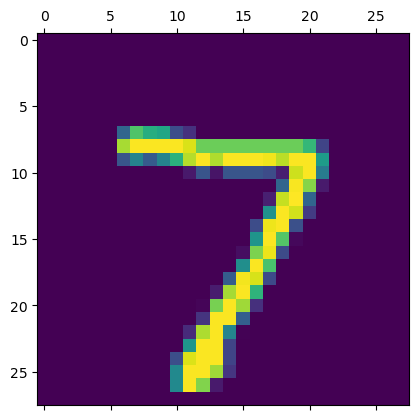

In [12]:
plt.matshow(x_test[0])

In [24]:
np.argmax(y_pred[0])              #np.argmax(arr) return index of max value in the array

7

In [14]:
first_ten = [np.argmax(arr) for arr in y_pred]
first_ten[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [15]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [16]:
conf_matrix = tf.math.confusion_matrix(y_test, first_ten)

In [17]:
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1104,    5,    2,    0,    1,    4,    2,   17,    0],
       [   9,    4,  940,   12,    8,    1,   12,   10,   31,    5],
       [   5,    0,   25,  914,    1,   21,    3,   14,   17,   10],
       [   2,    1,    6,    2,  909,    0,   10,    5,   10,   37],
       [  13,    1,    4,   38,   11,  755,   20,   10,   32,    8],
       [  13,    3,    7,    1,    8,    7,  915,    2,    2,    0],
       [   1,    5,   24,    4,    5,    0,    0,  958,    2,   29],
       [  14,    5,    9,   19,    9,   17,   11,   13,  866,   11],
       [  12,    5,    1,   10,   29,    4,    0,   30,    7,  911]])>

Text(50.722222222222214, 0.5, 'Truth')

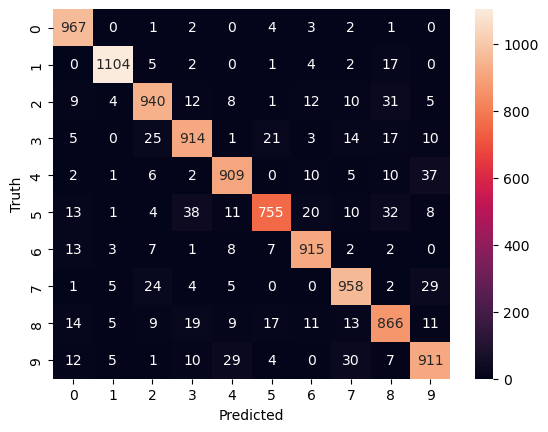

In [18]:
import seaborn as sn
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')